In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df1 = pd.read_csv('NVDA_historical_data1_jun10-14.csv')
df2 = pd.read_csv('NVDA_historical_data2_jun17-21.csv')
df3 = pd.read_csv('NVDA_historical_data3_jun24-28.csv')
df4 = pd.read_csv('NVDA_historical_data4_jul1-5.csv')
df5 = pd.read_csv('NVDA_historical_data5_jul8-12.csv')
df6 = pd.read_csv('NVDA_historical_data6_jul15-19.csv')
df7 = pd.read_csv('NVDA_historical_data7_jul22-26.csv')
df8 = pd.read_csv('NVDA_historical_data8_jul29-31.csv')
df9 = pd.read_csv('NVDA_historical_data9_aug1-2.csv')
df10 = pd.read_csv('NVDA_historical_data10_aug5-9.csv')
df11 = pd.read_csv('NVDA_historical_data11_aug12-16.csv')

In [36]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11])

In [37]:
df['Time'] = df['Datetime'].apply(lambda x: str(x[11:16]))

In [38]:
#df['Time'] = df['Datetime'].apply(lambda x: str(x[11:16]))
df[(df['High'] > 150) & (df['High']<1330)].value_counts()
df['Range'] = df['High'] - df['Low']
df['Open'] = df['Open'].round(2)
df['High'] = df['High'].round(2)
df['Low'] = df['Low'].round(2)
df['Adj Close'] = df['Adj Close'].round(2)
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')
df['Hour'] = df['Time'].apply(lambda x: x.hour)
df['Minute'] = df['Time'].apply(lambda x: x.minute)
df.drop(['Time', 'Datetime'], axis=1, inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3708 entries, 0 to 389
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3708 non-null   float64
 1   High       3708 non-null   float64
 2   Low        3708 non-null   float64
 3   Close      3708 non-null   float64
 4   Adj Close  3708 non-null   float64
 5   Volume     3708 non-null   int64  
 6   Range      3708 non-null   float64
 7   Hour       3708 non-null   int64  
 8   Minute     3708 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 289.7 KB


In [40]:
# Calculate Q1 and Q3 for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3440 entries, 1 to 389
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3440 non-null   float64
 1   High       3440 non-null   float64
 2   Low        3440 non-null   float64
 3   Close      3440 non-null   float64
 4   Adj Close  3440 non-null   float64
 5   Volume     3440 non-null   int64  
 6   Range      3440 non-null   float64
 7   Hour       3440 non-null   int64  
 8   Minute     3440 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 268.8 KB


In [42]:
#df['Range'] = df['High'] - df['Low']

In [43]:
df.drop(['Close',  'Volume','Range', 'Hour', 'Minute'], axis=1, inplace=True)
#df.drop(['Close'], axis=1, inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3440 entries, 1 to 389
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3440 non-null   float64
 1   High       3440 non-null   float64
 2   Low        3440 non-null   float64
 3   Adj Close  3440 non-null   float64
dtypes: float64(4)
memory usage: 134.4 KB


In [45]:
df['Avg_High_Low'] = (df['High'] + df['Low'])/2

In [46]:
df['Daily_Return'] = df['Adj Close'].pct_change().fillna(0)


In [47]:
df.head()


,Open,High,Low,Adj Close,Avg_High_Low,Daily_Return
1,120.48,120.93,119.86,120.75,120.395,0.000000
5,117.67,118.79,117.52,118.25,118.155,-0.020704
6,118.26,118.87,117.86,118.81,118.365,0.004736
7,118.83,119.20,118.51,118.95,118.855,0.001178
8,118.94,119.30,118.69,118.76,118.995,-0.001597


In [48]:
#df['Volatility'] = df['Adj Close'].rolling(window=20).std().fillna(0)


In [49]:
#df['Momentum'] = df['Adj Close'] - df['Adj Close'].shift(10).fillna(0)


In [50]:
#rolling_mean = df['Adj Close'].rolling(window=20).mean().fillna(method='bfill')
#rolling_std = df['Adj Close'].rolling(window=20).std().fillna(method='bfill')
#df['Bollinger_High'] = rolling_mean + (rolling_std * 2)
#df['Bollinger_Low'] = rolling_mean - (rolling_std * 2)


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3440 entries, 1 to 389
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3440 non-null   float64
 1   High          3440 non-null   float64
 2   Low           3440 non-null   float64
 3   Adj Close     3440 non-null   float64
 4   Avg_High_Low  3440 non-null   float64
 5   Daily_Return  3440 non-null   float64
dtypes: float64(6)
memory usage: 188.1 KB


In [52]:
df['Next_Close'] = df['Adj Close'].shift(-1)
df.dropna(inplace=True)

#df[['Open', 'High', 'Low','Volume','Range','Hour', 'Minute', 'Next_Close', 'Avg_High_Low']].corr()
df[['Open', 'High', 'Low','Adj Close' ,'Next_Close', 'Avg_High_Low', 'Daily_Return']].corr()

,Open,High,Low,Adj Close,Next_Close,Avg_High_Low,Daily_Return
Open,1.000000,0.999681,0.999642,0.999249,0.997568,0.999761,0.005232
High,0.999681,1.000000,0.999601,0.999650,0.997966,0.999900,0.015655
Low,0.999642,0.999601,1.000000,0.999678,0.997960,0.999901,0.016698
Adj Close,0.999249,0.999650,0.999678,1.000000,0.998260,0.999763,0.028462
Next_Close,0.997568,0.997966,0.997960,0.998260,1.000000,0.998062,0.026133
Avg_High_Low,0.999761,0.999900,0.999901,0.999763,0.998062,1.000000,0.016180
Daily_Return,0.005232,0.015655,0.016698,0.028462,0.026133,0.016180,1.000000


<Axes: >

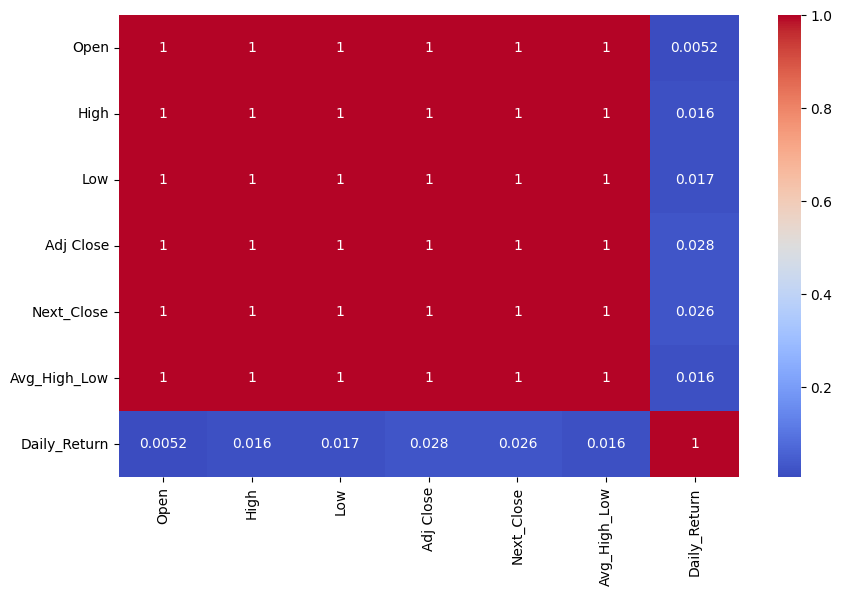

In [53]:
plt.figure(figsize=(10, 6))
#sns.heatmap(df[['Open', 'High', 'Low', 'Volume', 'Range','Hour', 'Minute', 'Next_Close', 'Avg_High_Low']].corr(), annot=True, cmap='coolwarm')
#sns.heatmap(df[['Open', 'High', 'Low', 'Volume', 'Range','Hour', 'Minute', 'Next_Close', 'Avg_High_Low']].corr(), annot=True, cmap='coolwarm')
sns.heatmap(df[['Open', 'High', 'Low','Adj Close' ,'Next_Close', 'Avg_High_Low', 'Daily_Return']].corr(), annot=True, cmap='coolwarm')

In [54]:
#df[['Open', 'High', 'Low', 'Adj Close','Volume','Range','Hour', 'Minute', 'Next_Close', 'Avg_High_Low']].corr()
df[['Open', 'High', 'Low','Adj Close' ,'Next_Close', 'Avg_High_Low', 'Daily_Return']].corr()

,Open,High,Low,Adj Close,Next_Close,Avg_High_Low,Daily_Return
Open,1.000000,0.999681,0.999642,0.999249,0.997568,0.999761,0.005232
High,0.999681,1.000000,0.999601,0.999650,0.997966,0.999900,0.015655
Low,0.999642,0.999601,1.000000,0.999678,0.997960,0.999901,0.016698
Adj Close,0.999249,0.999650,0.999678,1.000000,0.998260,0.999763,0.028462
Next_Close,0.997568,0.997966,0.997960,0.998260,1.000000,0.998062,0.026133
Avg_High_Low,0.999761,0.999900,0.999901,0.999763,0.998062,1.000000,0.016180
Daily_Return,0.005232,0.015655,0.016698,0.028462,0.026133,0.016180,1.000000


In [55]:
'''from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Open', 'High', 'Low','Adj Close', 'Avg_High_Low', 'Daily_Return']])
scaled_features = scaler.transform(df[['Open', 'High', 'Low','Adj Close', 'Avg_High_Low', 'Daily_Return']])
scaled_df = pd.DataFrame(scaled_features, columns=['Open', 'High', 'Low','Adj Close', 'Avg_High_Low', 'Daily_Return'])
print(scaled_df.head())'''

"from sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nscaler.fit(df[['Open', 'High', 'Low','Adj Close', 'Avg_High_Low', 'Daily_Return']])\nscaled_features = scaler.transform(df[['Open', 'High', 'Low','Adj Close', 'Avg_High_Low', 'Daily_Return']])\nscaled_df = pd.DataFrame(scaled_features, columns=['Open', 'High', 'Low','Adj Close', 'Avg_High_Low', 'Daily_Return'])\nprint(scaled_df.head())"

In [56]:
'''from sklearn.model_selection import train_test_split
X = scaled_df
y = df['Next_Close'].reset_index(drop=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)'''

"from sklearn.model_selection import train_test_split\nX = scaled_df\ny = df['Next_Close'].reset_index(drop=True)\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)"

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

# Assuming df contains your entire dataset including 'Next_Close'
X = df[['Open', 'High', 'Low', 'Adj Close', 'Avg_High_Low', 'Daily_Return']]
y = df['Next_Close']

# Scale features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_features, columns=['Open', 'High', 'Low', 'Adj Close', 'Avg_High_Low', 'Daily_Return'])

# Train on the entire dataset
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(scaled_df, y)

# Predict on the entire dataset
df['Predicted_Close'] = knn.predict(scaled_df)

# Save to CSV
df.to_csv('data_with_predictions.csv', index=False)


In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# For the entire dataset (if you want to evaluate)
predict = df['Predicted_Close']
actual = df['Next_Close']

In [59]:
print("Mean Absolute Error:", mean_absolute_error(actual, predict))
print("Mean Squared Error:", mean_squared_error(actual, predict))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(actual, predict)))


Mean Absolute Error: 0.2851671997673744
Mean Squared Error: 0.22061812271009015
Root Mean Squared Error: 0.4697000348201926


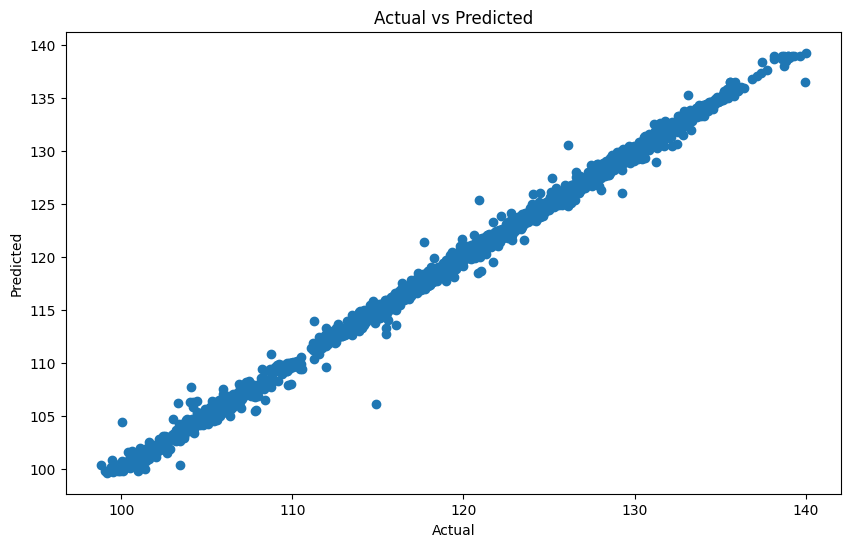

In [60]:
# Scatter plot of actual vs. predicted
plt.figure(figsize=(10, 6))
plt.scatter(actual, predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [61]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3439 entries, 1 to 388
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3439 non-null   float64
 1   High          3439 non-null   float64
 2   Low           3439 non-null   float64
 3   Adj Close     3439 non-null   float64
 4   Avg_High_Low  3439 non-null   float64
 5   Daily_Return  3439 non-null   float64
dtypes: float64(6)
memory usage: 188.1 KB


In [62]:
'''from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)'''

'from sklearn.neighbors import KNeighborsRegressor\nknn = KNeighborsRegressor(n_neighbors=5)\nknn.fit(X_train, y_train)'

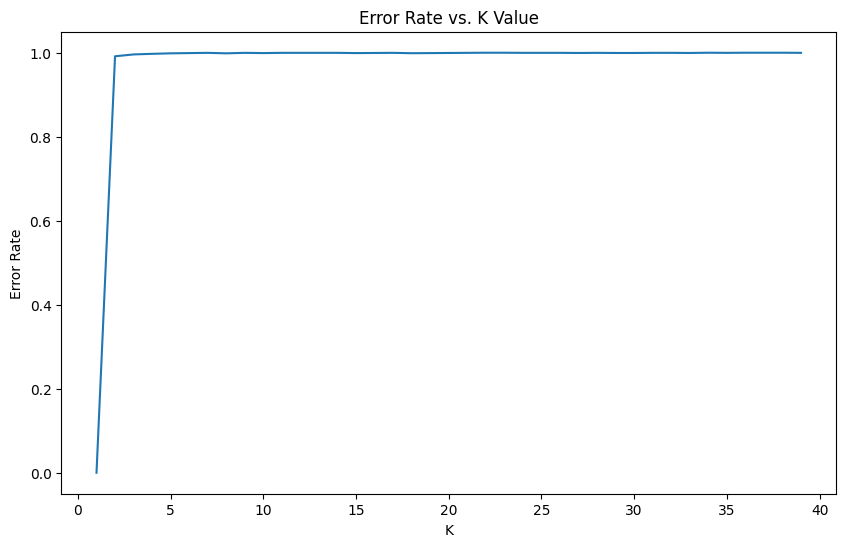

In [63]:
error_rate = []
for i in range(1, 40):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(scaled_df, y)
    pred_i = model.predict(scaled_df)
    error_rate.append(np.mean(pred_i != y))

# Plot the error rate against the K values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [64]:
#predict = knn.predict(X_test)

In [65]:
'''from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_test, predict))
print(mean_squared_error(y_test, predict))
print(np.sqrt(mean_squared_error(y_test, predict)))'''

'from sklearn.metrics import mean_absolute_error, mean_squared_error\nprint(mean_absolute_error(y_test, predict))\nprint(mean_squared_error(y_test, predict))\nprint(np.sqrt(mean_squared_error(y_test, predict)))'

In [66]:
new_data = pd.DataFrame({
    'Open': [126.4],
    'High': [126.69],
    'Low': [126.38],
    'Adj Close': [126.47],
})
new_data['Avg_High_Low'] = (new_data['High'] + new_data['Low']) / 2
#new_data['Range'] = new_data['High'] - new_data['Low']
new_data['Daily_Return'] = new_data['Adj Close'].pct_change().fillna(0)



new_data_scaled = scaler.transform(new_data)
prediction = knn.predict(new_data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [67]:
#new_data.head()

In [68]:
#print('Predicted Close Price for next 5 minutes', prediction[0])

In [69]:
import pandas as pd

# Assuming df contains the actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': df['Next_Close'],
    'Predicted': df['Predicted_Close']
})

# Display the first 50 rows of the comparison DataFrame
comparison_df.head(50)


,Actual,Predicted
1,118.25,119.916
5,118.81,118.244
6,118.95,118.682
7,118.76,118.962
8,119.20,118.726
9,119.96,119.130
10,119.93,120.210
11,119.70,120.220
12,120.67,119.912
13,120.64,120.546


In [70]:
comparison_df.corr()

,Actual,Predicted
Actual,1.000000,0.998629
Predicted,0.998629,1.000000


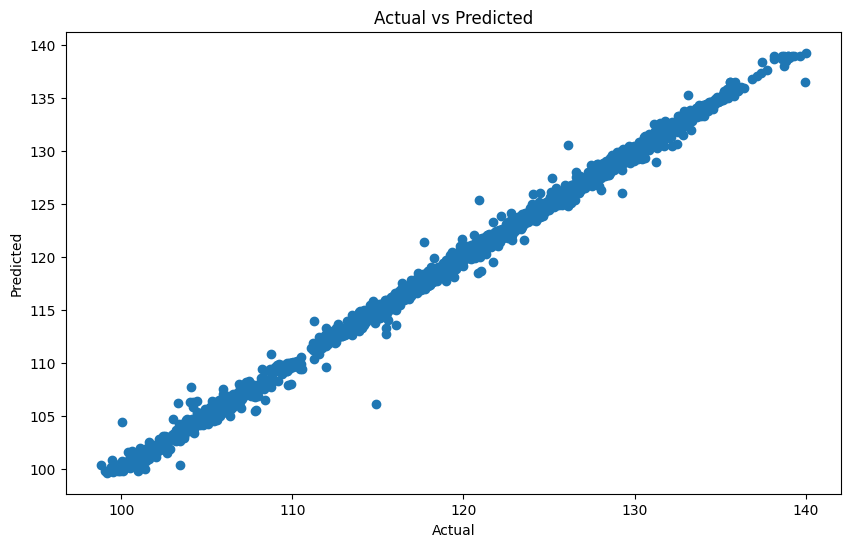

In [71]:
# Display the DataFrame

plt.figure(figsize=(10, 6))
plt.scatter(df['Next_Close'], df['Predicted_Close'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()